In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [7]:
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
from tensorflow.keras.optimizers import Adam

In [10]:
from tensorflow.keras.models import Model

In [11]:
image_dimensions = {'height':256, 'width':256, 'channels':3}

In [12]:
class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [13]:
class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [ ]:
meso = Meso4()
meso.load("C:\\Users\slhem\\Downloads\\kiteco python-youtube-code master Deepfake-detection\weights\\Meso4_DF")

In [17]:
dataGenerator = ImageDataGenerator(rescale=1./255)

In [19]:
generator = dataGenerator.flow_from_directory(
    "C:\\Users\slhem\Downloads\\kiteco python-youtube-code master Deepfake-detection\\data",
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

Found 7104 images belonging to 2 classes.


In [20]:
generator.class_indices

{'DeepFake': 0, 'Real': 1}

In [ ]:
!rmdir /s /q ""C:\\Users\slhem\Downloads\\kiteco python-youtube-code master Deepfake-detection\\.ipynb_checkpoints""

In [25]:

dataGenerator = ImageDataGenerator(rescale=1./255)

In [26]:
generator = dataGenerator.flow_from_directory(
    "C:\\Users\Admin\Downloads\\kiteco python-youtube-code master Deepfake-detection (1)\\data",
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

Found 7104 images belonging to 2 classes.


In [27]:
X, y = generator.next()

In [28]:
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")

1/1 [==============================] - 0s 375ms/step
Predicted likelihood: 0.9839


In [29]:
print(f"Actual label: {int(y[0])}")

Actual label: 1


In [30]:
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

1/1 [==============================] - 0s 33ms/step

Correct prediction: True


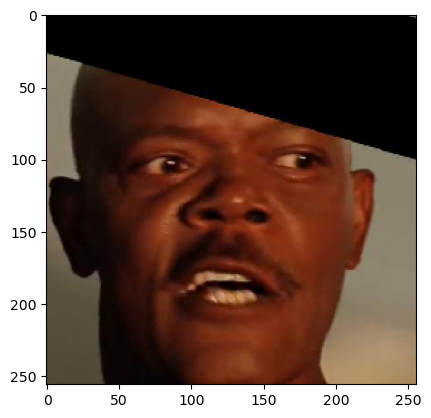

In [31]:
plt.imshow(np.squeeze(X));

In [32]:
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [33]:

for i in range(len(generator.labels)):
    
    
    X, y = generator.next()
    pred = meso.predict(X)[0][0]
    
    
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)   
        
    
    if i % 1000 == 0:
        print(i, ' predictions completed.')
    
    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

1/1 [==============================] - 0s 27ms/step
0  predictions completed.
1/1 [==============================] - 0s 32ms/step
1000  predictions completed.
1/1 [==============================] - 0s 33ms/step
2000  predictions completed.
1/1 [==============================] - 0s 42ms/step
3000  predictions completed.
1/1 [==============================] - 0s 44ms/step
4000  predictions completed.
1/1 [==============================] - 0s 34ms/step
5000  predictions completed.
1/1 [==============================] - 0s 51ms/step
6000  predictions completed.
1/1 [==============================] - 0s 38ms/step
7000  predictions completed.
1/1 [==============================] - 0s 36ms/step
All 7104 predictions completed


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step
1000  predictions completed.
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step
2000  predictions completed.
1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 42ms/step
3000  predictions completed.
1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 44ms/step
4000  predictions completed.
1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step
5000  predictions completed.
1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 51ms/step
6000  predictions completed.
1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 38ms/step
7000  predictions completed.
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 36ms/step
All 7104 predictions completed


In [ ]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

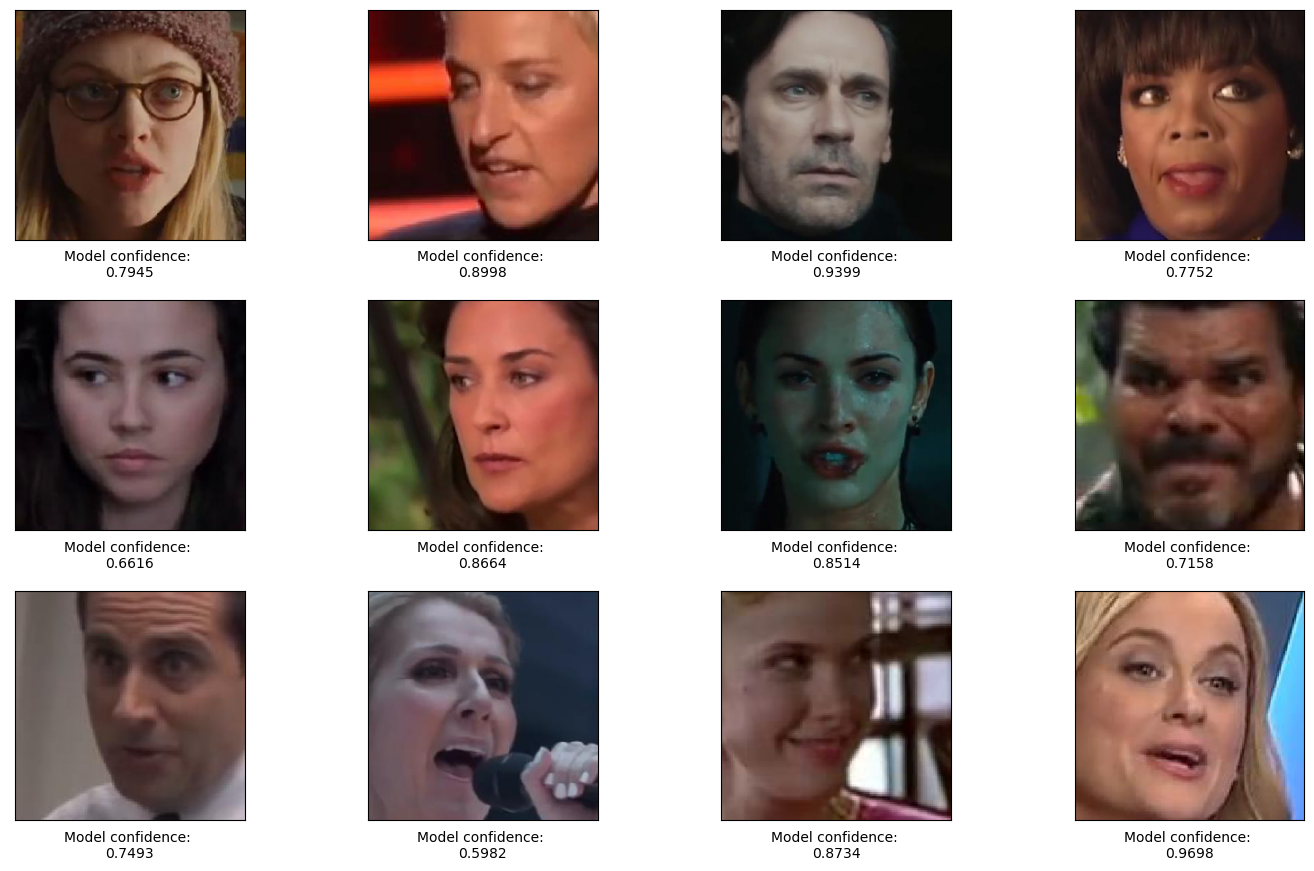

In [35]:
plotter(correct_real, correct_real_pred)


# the below images are  real image the model confidence is above 70% 

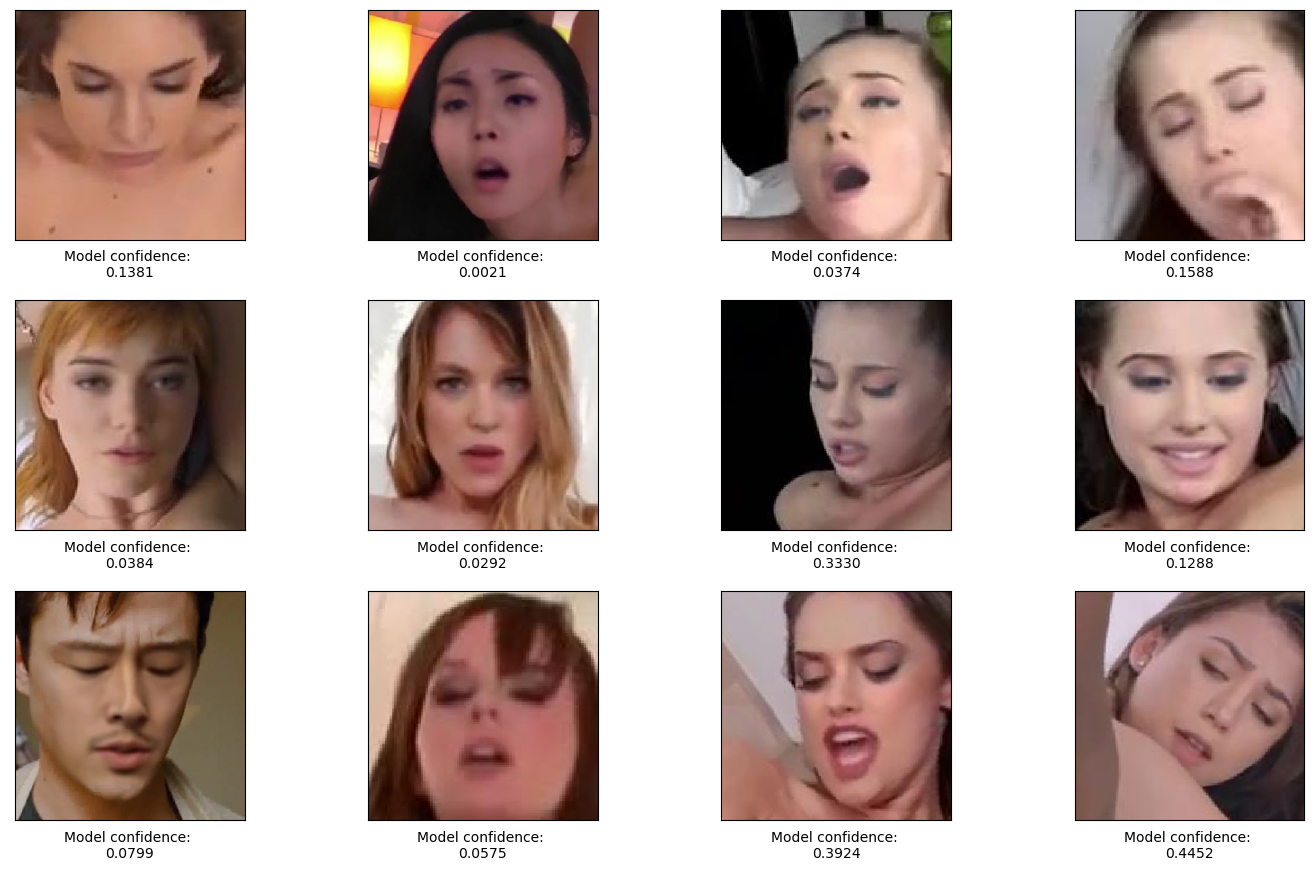

In [36]:
plotter(correct_deepfake, correct_deepfake_pred)

# the below images are  deepfake image the model confidence is less than 40% 